In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Multiple plot

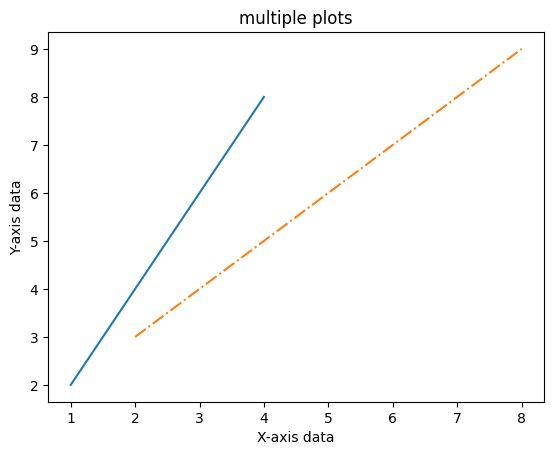

In [3]:

x = np.array([1, 2, 3, 4])
y = x*2
 
# first plot with X and Y data
plt.plot(x, y)
 
x1 = [2, 4, 6, 8]
y1 = [3, 5, 7, 9]
 
# second plot with x1 and y1 data
plt.plot(x1, y1, '-.')
 
plt.xlabel("X-axis data")
plt.ylabel("Y-axis data")
plt.title('multiple plots')
plt.show()

### Bar Chart

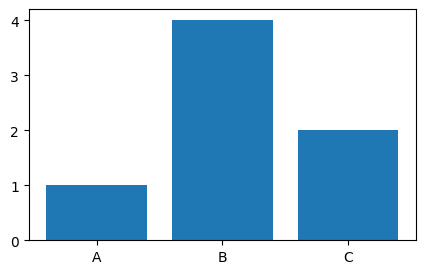

In [4]:
labels = ['A', 'B', 'C']
values = [1,4,2]

plt.figure(figsize=(5,3), dpi=100)

bars = plt.bar(labels, values)



plt.show()

### Line Graph

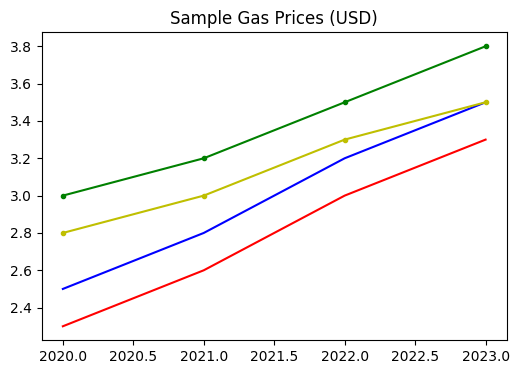

In [11]:
import matplotlib.pyplot as plt

# Define some dummy years (less data for simpler plot)
years = [2020, 2021, 2022, 2023]

# Create dummy gas prices (change values as needed)
usa_prices = [2.50, 2.80, 3.20, 3.50]
canada_prices = [2.30, 2.60, 3.00, 3.30]
south_korea_prices = [3.00, 3.20, 3.50, 3.80]
australia_prices = [2.80, 3.00, 3.30, 3.50]

# Configure the plot
plt.figure(figsize=(6, 4))  # Reduce figure size

plt.title('Sample Gas Prices (USD)')

# Plot the data with labels
plt.plot(years, usa_prices, color='blue', label='USA')
plt.plot(years, canada_prices, 'red', label='Canada')
plt.plot(years, south_korea_prices, 'g.-', label='South Korea')
plt.plot(years, australia_prices, 'y.-', label='Australia')




### Histogram

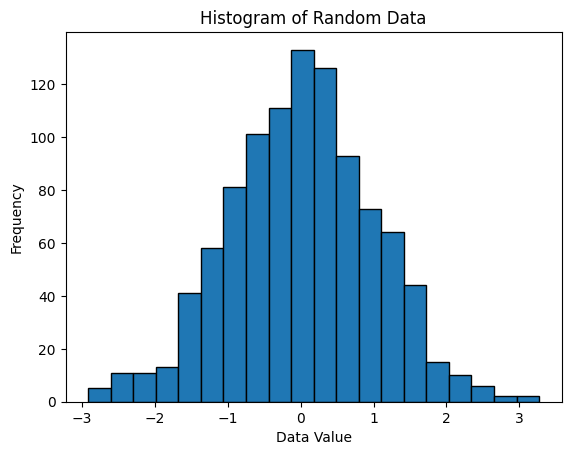

In [13]:


# Generate some random data
data = np.random.randn(1000)  # Sample 1000 random numbers from normal distribution

# Configure the histogram
plt.hist(data, bins=20, edgecolor='black')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.title('Histogram of Random Data')


plt.show()




### Pie Chart

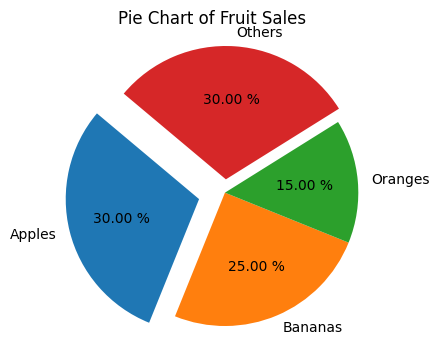

In [36]:
import matplotlib.pyplot as plt

# Define data (slice labels and values)
labels = ['Apples', 'Bananas', 'Oranges', 'Others']
values = [30, 25, 15, 30]
explode = (.2,0,0,.1)


plt.figure(figsize=(4, 4))  # Set a square figure size
plt.pie(values, labels=labels,explode=explode,autopct='%.2f %%', startangle=140)  # Customize options

# Add a title
plt.title('Pie Chart of Fruit Sales')

plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart

plt.show()
